<a href="https://colab.research.google.com/github/abhishiron/sales-analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [ ]:
sheets

In [ ]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [ ]:
print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_customers.shape))
print("df_products shape: ", (df_products.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_reg shape: ", (df_state_reg.shape))
print("df_budgets shape: ", (df_budgets.shape))

In [ ]:
df_customers.head()

In [ ]:
df_budgets.head()

In [ ]:
df_products.head()

In [ ]:
df_regions.head()

In [ ]:
df_state_reg.head()

In [ ]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg.drop(df_state_reg.index[0])
df_state_reg.head()


In [ ]:
df_budgets.isnull().sum()

In [ ]:
df_state_reg.isnull().sum()

In [ ]:
df_customers.isnull().sum()

In [ ]:
df_sales.isnull().sum()

In [ ]:
df_products.isnull().sum()

### **Data cleaning and wrangling**

In [ ]:
# merger with customers table
df = df_sales.merge(df_customers, left_on= 'Customer Name Index',
                    right_on='Customer Index',
                    how = 'left')
df.head(5)

In [ ]:
#merge with products table
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [ ]:
#merge with regions table
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [ ]:
#merge with state region table
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [ ]:
#meger with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on = 'Product Name'
)

In [ ]:
df.head(5)

In [ ]:
#clean up redudant tables
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors = 'ignore')

In [ ]:
df.columns = df.columns.str.lower()
df.columns.values

In [ ]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [ ]:
df = df[cols_to_keep]

In [ ]:
df.head(5)

In [ ]:
# Rename the columns
df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total_unit_cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})
df.head(1)

In [ ]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# line total is revenue
df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

In [ ]:
#filter the dataset for records of only year 2017
df_2017 = df[df['order_date'].dt.year == 2017]


In [ ]:
df.isnull().sum()

In [ ]:
df_2017.head(5)

#### Feature eng

In [ ]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

df['profit'] = df['revenue'] - df['total_cost']

In [40]:
df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,32.08354,-81.09983,NaN,10946.058,4048.542,27.0


#### **EDA**

In [69]:
# Assuming df is your DataFrame
# Convert order_date to datetime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]



/tmp/ipython-input-71-1835430407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-71-1835430407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['YearMonth'] = df_new['order_date'].dt.to_period('M')


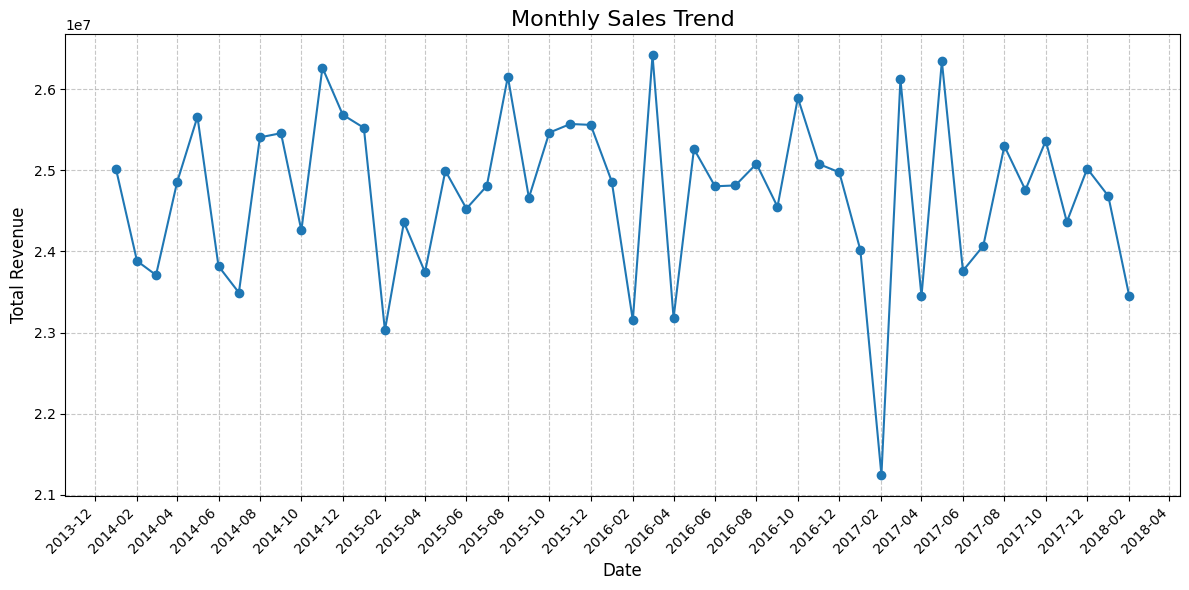

In [71]:
df_new['order_date'] = pd.to_datetime(df_new['order_date'])


df_new['YearMonth'] = df_new['order_date'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['revenue'].sum().reset_index()

monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

plt.plot(monthly_sales['YearMonth'], monthly_sales['revenue'], marker='o', linestyle='-')

plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Insights
Across all years, sales exhibit a strong seasonal pattern, beginning with a post-New Year surge in January, reaching approximately 99M, which is then followed by a steep decline to a slow point of about 95M in April. Sales subsequently rebound in May and August, hitting around 102M, before settling into a consistent plateau of 99−101M from September through December, revealing a clear spring dip and a mid-summer bump each calendar year.

/tmp/ipython-input-50-1630956742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-50-1630956742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


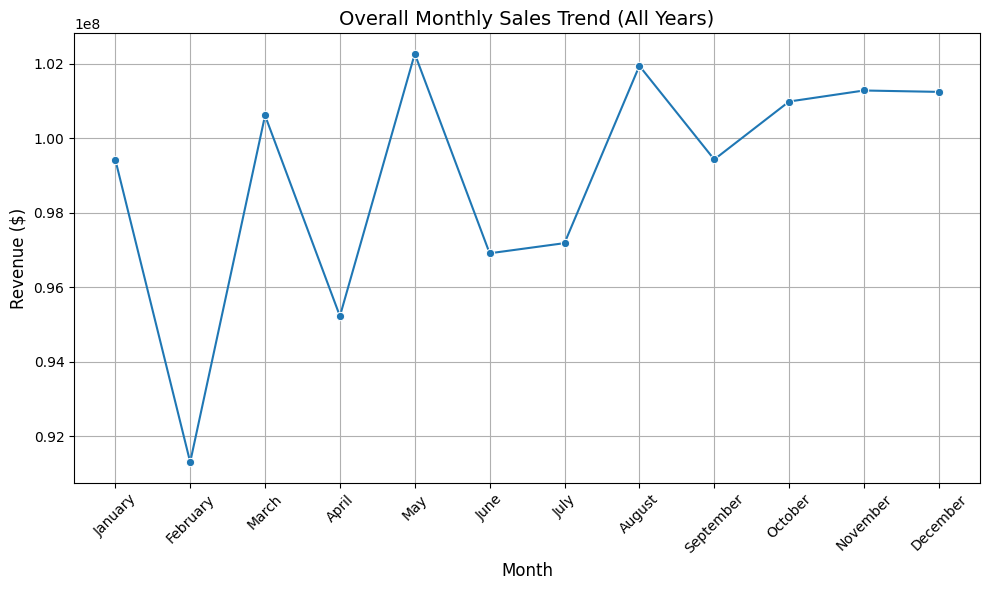

In [50]:
# Assuming df is your DataFrame
# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Insights
Across all years, sales exhibit a strong seasonal pattern, beginning with a post-New Year surge in January, reaching approximately 99M, which is then followed by a steep decline to a slow point of about 95M in April. Sales subsequently rebound in May and August, hitting around 102M, before settling into a consistent plateau of 99−101M from September through December, revealing a clear spring dip and a mid-summer bump each calendar year.

/tmp/ipython-input-52-1447960539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['revenue'] = pd.to_numeric(df_new['revenue'], errors='coerce')
/tmp/ipython-input-52-1447960539.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset=['revenue'], inplace=True)
/tmp/ipython-input-52-1447960539.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_name', y='revenue', data=to

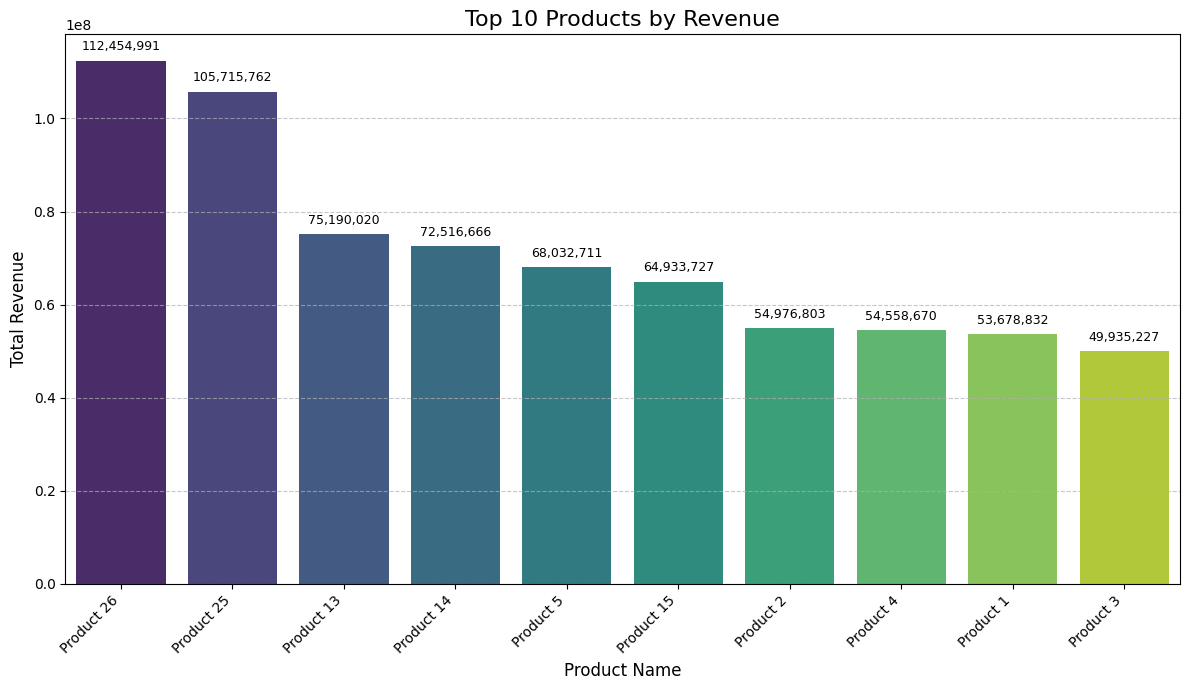

In [52]:

df_new['revenue'] = pd.to_numeric(df_new['revenue'], errors='coerce')

# Drop any rows where revenue might have become NaN due to conversion errors
df_new.dropna(subset=['revenue'], inplace=True)


# --- Calculate total revenue for each product ---
# Group by 'product_name' and sum the 'revenue'
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# --- Sort in descending order and get the top 10 ---
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# --- Create the bar chart ---
plt.figure(figsize=(12, 7)) # Set a good figure size for a bar chart

# Use seaborn's barplot for a visually appealing bar chart
ax = sns.barplot(x='product_name', y='revenue', data=top_10_products, palette='viridis')

# --- Add total revenue labels on top of the bars ---
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', # Format as integer with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), # 10 points vertical offset
                textcoords='offset points',
                fontsize=9, color='black')


# --- Customize the plot ---
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate product names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot


#### Insights
Products 26 and 25 pull away at 118M and 110M, with a sharp drop to 78M for Product 13 and a tight mid-pack at 68−75M.

The bottom four cluster at 52−57M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

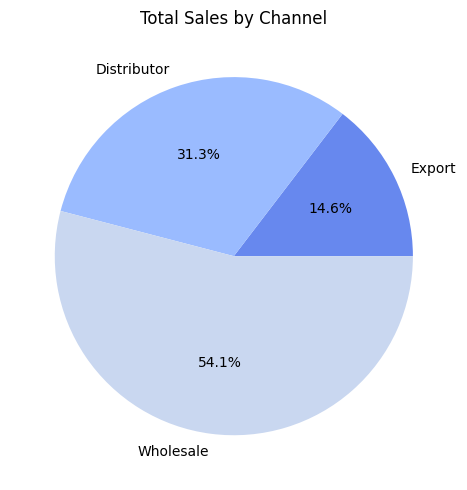

In [53]:
## Sales by Channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

#### Insights
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

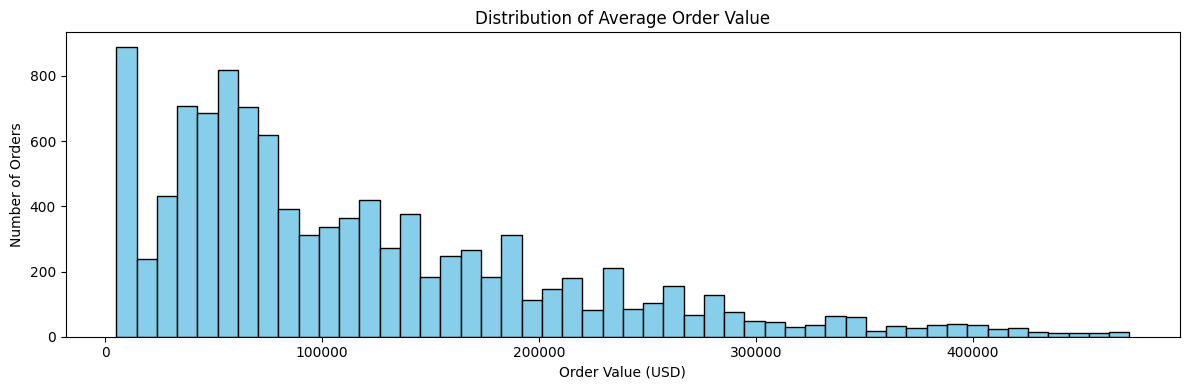

In [60]:
aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

#### Insights
The order-value distribution is heavily right-skewed, with most orders clustering between 20K and 120K and a pronounced mode around 50K−60K.

A long tail of high-value transactions extends up toward 400K−500K, but these large orders represent only a small share of total volume.

/tmp/ipython-input-61-1117622040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='unit_price', data=df_filtered_products, palette='viridis')


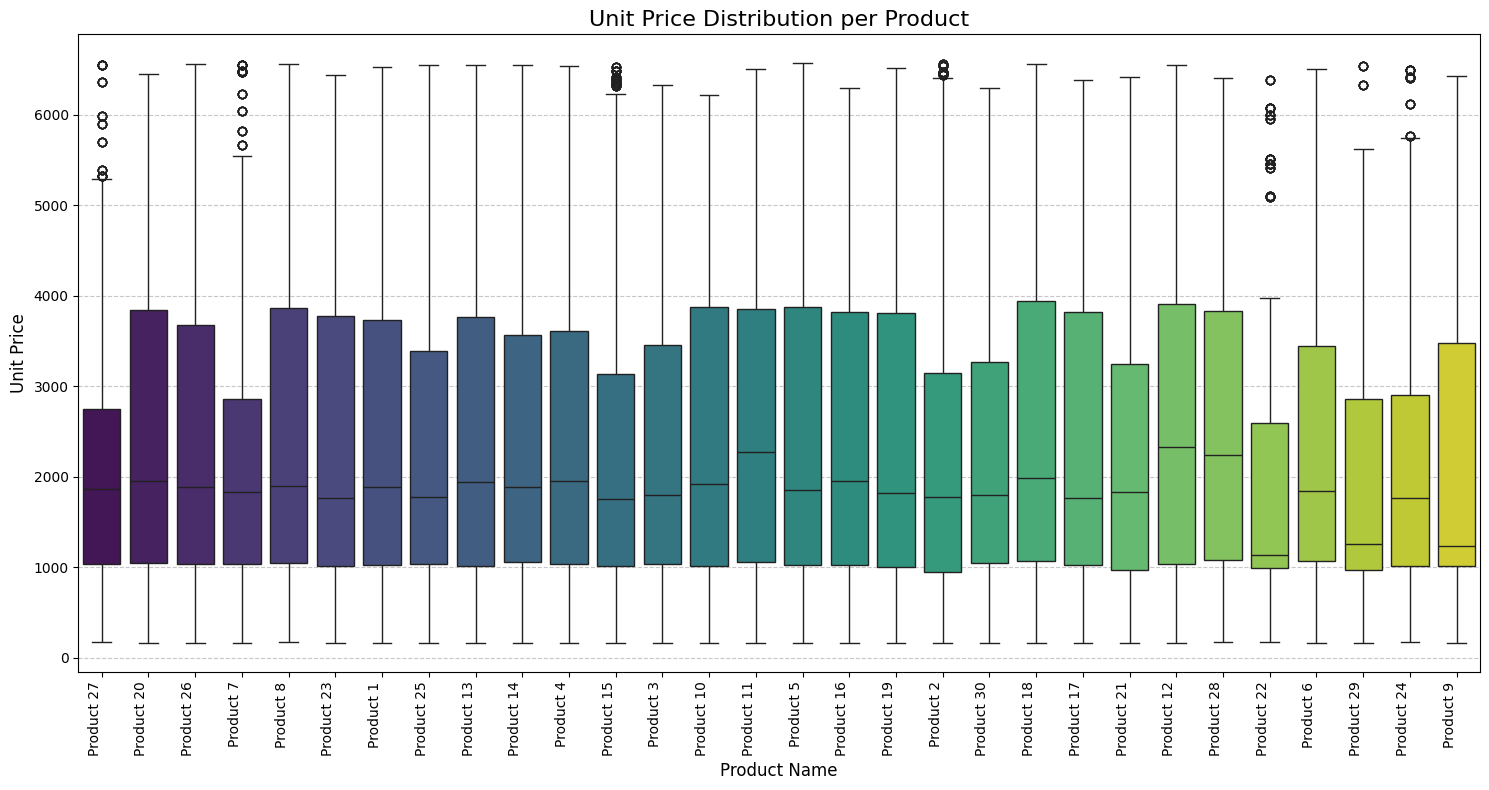

In [61]:
# Ensure 'unit_price' column is numeric
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

# Drop any rows where unit_price might have become NaN due to conversion errors
df.dropna(subset=['unit_price'], inplace=True)

# Filter out products with very few entries if their distribution isn't meaningful
# For example, only keep products that appear at least 10 times
# This step is optional but can make the plot cleaner if you have many rare products
product_counts = df['product_name'].value_counts()
products_to_include = product_counts[product_counts >= 10].index # Adjust 10 as needed
df_filtered_products = df[df['product_name'].isin(products_to_include)]


# --- Create the box plot ---
# Set a larger figure size to accommodate multiple product categories
plt.figure(figsize=(15, 8))

# Use seaborn.boxplot to show the distribution of 'unit_price' for each 'product_name'
# You might want to select a subset of products if there are too many for readability
# For example, you could take the top N products by revenue or frequency first.
sns.boxplot(x='product_name', y='unit_price', data=df_filtered_products, palette='viridis')

# --- Customize the plot ---
plt.title('Unit Price Distribution per Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.xticks(rotation=90, ha='right') # Rotate product names for better readability if many products
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot


#### Insights-
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 0−100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

/tmp/ipython-input-63-3864181297.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='total_revenue', data=top_10_states, ax=axes[0], palette='viridis')
/tmp/ipython-input-63-3864181297.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_name', y='order_count', data=top_10_states, ax=axes[1], palette='magma')


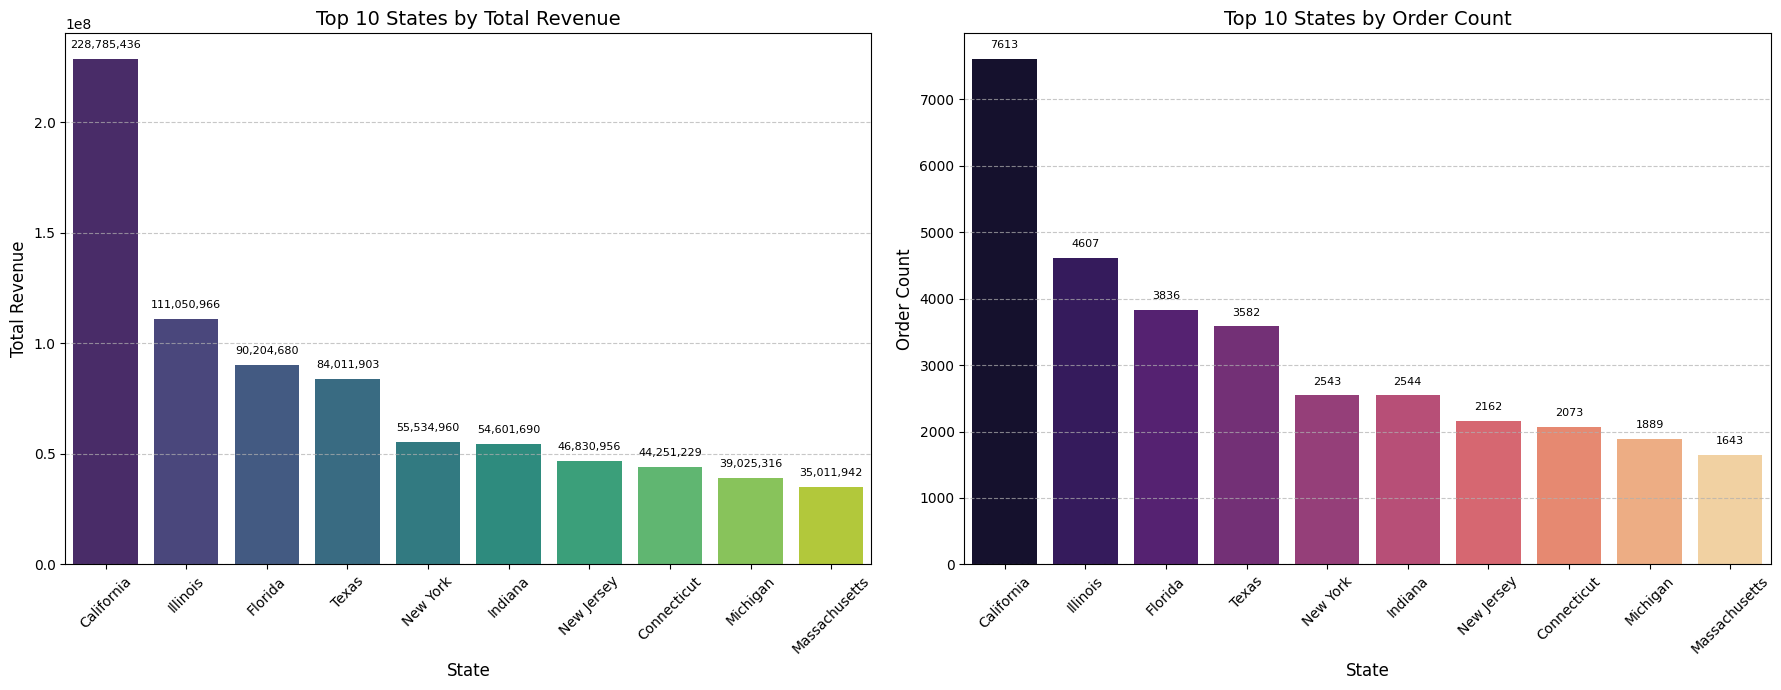

In [63]:
# Ensure 'revenue' column is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df.dropna(subset=['revenue'], inplace=True)

# Ensure 'order_number' is suitable for counting unique orders
# If 'order_number' is truly unique per order, we can use nunique()
# If it's just an identifier, and each row is one line item of an order,
# then counting unique order_numbers will give total orders.

# --- Calculate total revenue and order count per state ---
# Group by 'state_name' (assuming this is the clean state name column)
# If 'state' is the clean column, use 'state' instead of 'state_name'
state_summary = df.groupby('state_name').agg(
    total_revenue=('revenue', 'sum'),
    order_count=('order_number', 'nunique') # Count unique order numbers for total orders
).reset_index()

# --- Sort by total revenue in descending order and get the top 10 ---
top_10_states = state_summary.sort_values(by='total_revenue', ascending=False).head(10)

# --- Create the plots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 1 row, 2 columns of subplots

# Plot 1: Total Revenue by State
sns.barplot(x='state_name', y='total_revenue', data=top_10_states, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 States by Total Revenue', fontsize=14)
axes[0].set_xlabel('State', fontsize=12)
axes[0].set_ylabel('Total Revenue', fontsize=12)
axes[0].tick_params(axis='x', rotation=45) # Removed ha='right'
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add revenue labels on top of the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=8, color='black')


# Plot 2: Order Count by State
sns.barplot(x='state_name', y='order_count', data=top_10_states, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 States by Order Count', fontsize=14)
axes[1].set_xlabel('State', fontsize=12)
axes[1].set_ylabel('Order Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45) # Removed ha='right'
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add order count labels on top of the bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=8, color='black')


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plots


#### Insights
The charts reveal a pronounced revenue and order count concentration, with California leading significantly at approximately 228.7M and 7,613 orders, followed by Illinois at 111.0M and 4,607 orders. A substantial drop is observed to the next tier of states like Florida and Texas, highlighting that the top two markets are disproportionately driving overall volume and revenue. The remaining states in the top ten contribute a mid-tier performance, with revenues ranging from 35M to 78M and order counts from 1,600 to 3,500, indicating a clear opportunity to focus growth efforts beyond the primary two states to diversify revenue streams.

/tmp/ipython-input-64-2361649795.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='channel', y='profit_margin_pct', data=avg_profit_margin_channel, palette='coolwarm')


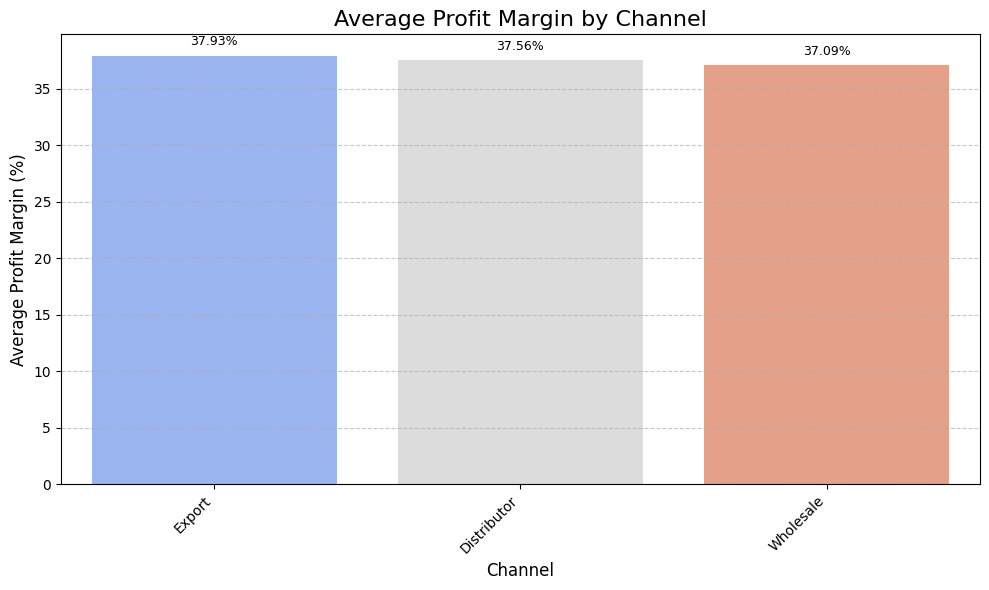

In [64]:
# Ensure 'profit_margin_pct' column is numeric
# Assuming 'profit_margin_pct' has already been calculated in your df DataFrame
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')
df.dropna(subset=['profit_margin_pct'], inplace=True)

# --- Calculate average profit margin per channel ---
# Group by 'channel' and calculate the mean of 'profit_margin_pct'
avg_profit_margin_channel = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Sort the channels by average profit margin for better visualization
avg_profit_margin_channel = avg_profit_margin_channel.sort_values(by='profit_margin_pct', ascending=False)

# --- Create the bar chart ---
plt.figure(figsize=(10, 6)) # Set a good figure size

# Use seaborn.barplot to show the average profit margin for each channel
ax = sns.barplot(x='channel', y='profit_margin_pct', data=avg_profit_margin_channel, palette='coolwarm')

# --- Add average profit margin labels on top of the bars ---
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', # Format as percentage with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), # 10 points vertical offset
                textcoords='offset points',
                fontsize=9, color='black')

# --- Customize the plot ---
plt.title('Average Profit Margin by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate channel names if they overlap
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot


#### Insights-
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

This uniformity implies well-controlled costs and pricing power everywhere.

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.